In [1]:
import matplotlib.pyplot as plt
plt.rcParams['font.family'] = 'stixgeneral'
import numpy as np

import camb

In [2]:
lm = 5000

In [5]:
def get_lensing_camb(_As):
    pars = camb.set_params(H0 = 67.4, As=np.exp(_As)/(1e10), lmax=lm)
    results = camb.get_results(pars)
    powers = results.get_cmb_power_spectra(pars, CMB_unit='muK')
    lensed = powers['total'][2:lm, 0]
    unlensed = powers['unlensed_total'][2:lm, 0]
    return lensed/unlensed

In [133]:
_as = [1.7, 1.8, 2, 3.043, 3.3]
ells = np.array([l for l in range(2, lm)])
n = len(_as)
lensings_camb = [get_lensing_camb(_as[i]) for i in range(n)]
label_key = ["$A_s$ = " + str(_as[i]) for i in range(n)]
fid_ombh2 = 0.0224
fid_omch2 = 0.12

In [141]:
def lensing_tail_fit(ell, As_mag):
    x5 = As_mag / 3.043 - 1
        
    beta_1 = 0.6838 
    beta_2 = 2803.1562 * (1 + 0.02370766 * x5 )
    
    beta_3 = 3752.098 * (1 + -0.1535454 * x5 )
    beta_4 = 407.009  * (1 + 0.36037145 * x5 +-1.32532168 * x5**2 )
    alpha = 2.5867 * (1 + 1.3802006  * x5 + 0.74379034   * x5**2)
        
    sigm = (1 + np.exp(-(ell-beta_3)/beta_4))**(-1)

    poly = (beta_1*(ell/beta_2)**alpha - 1)
    
    L = poly*sigm + 1
    
    return L

In [142]:
lensings_fit = [lensing_tail_fit(ells, _as[i]) for i in range(n)]

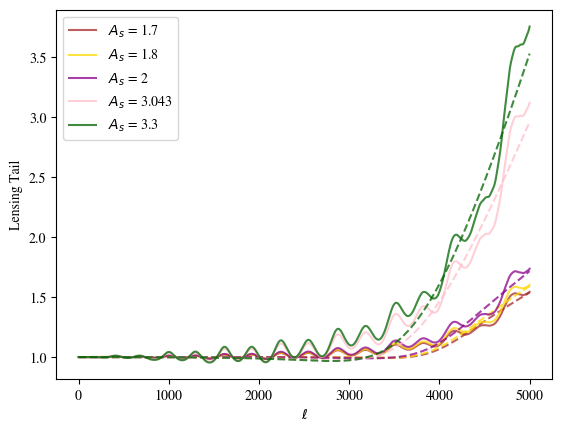

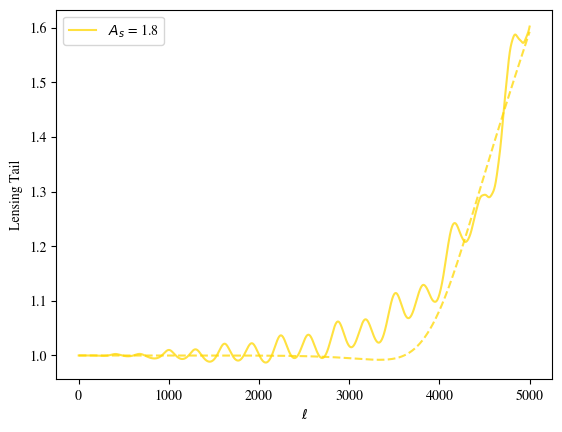

In [143]:
color_key = ["brown","gold","darkmagenta", "pink", "darkgreen", "aqua", "slateblue", "palegreen", "crimson", "blue", "lime"]
for i in range(n):
    plt.plot(ells, lensings_fit[i], color = color_key[i], linestyle = "dashed", alpha = 0.75)
    plt.plot(ells, lensings_camb[i], color = color_key[i], label = label_key[i], alpha = 0.75)
plt.xlabel("$\\ell$")
plt.ylabel("Lensing Tail")
#plt.ylim(0.9,3)
plt.legend()
plt.show()
for i in [1]: 
    plt.plot(ells, lensings_fit[i], color = color_key[i], linestyle = "dashed", alpha = 0.75)
    plt.plot(ells, lensings_camb[i], color = color_key[i], label = label_key[i], alpha = 0.75)
plt.legend()
plt.xlabel("$\\ell$")
plt.ylabel("Lensing Tail")
plt.show()